In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

menu_fiyat = [30,150,50,25,200]
musteri_puan=[7,9,6,8,10]
restoran_tipi=['Fast Food','Fine Dining','Aile','Fast Food','Fine Dining']

In [2]:
X = np.array(list(zip(menu_fiyat, musteri_puan)))
y = np.array(restoran_tipi)

In [3]:
yeni_restoran=np.array([[60,7]])

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

sonuc=knn.predict(yeni_restoran)
print(f"Yeni Restoran tipi: {sonuc[0]}")

Yeni Restoran tipi: Fast Food


**Parametreler Ve Mimari**

K ( Komşu Sayısı ):

- K sayısı küçüldükçe algoritma daha hassaslaşır ama overfitting( aşırı öğrenme ) ihtimali artar
- K sayısı büyüdükçe genelleme artar ama lokal ayrıntılar göz ardı edilir.

Mesafe Metrikleri

- Öklid Uzaklığı
- Manhattan Uzaklığı
- Minkowski Uzaklığı

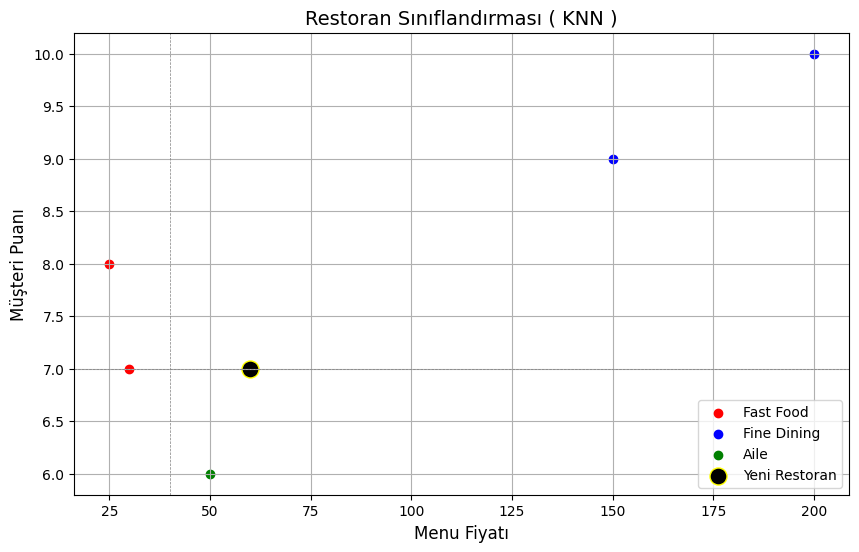

In [6]:
import matplotlib.pyplot as plt

renkler = {'Fast Food':'red', 'Fine Dining':'blue','Aile':'green'}
plt.figure(figsize=(10,6))

#Eğitim verilerini görselleştirme
for idx, restoran in enumerate(X):
  plt.scatter(restoran[0],restoran[1],color = renkler[y[idx]],
              label=y[idx] if y[idx] not in plt.gca().get_legend_handles_labels()[1] else '')
# Yeni restoranı görselleştir

plt.scatter(yeni_restoran[0,0], yeni_restoran[0,1], color='black',
            label='Yeni Restoran', edgecolor='yellow', s=150)

plt.title('Restoran Sınıflandırması ( KNN )', fontsize=14)
plt.xlabel('Menu Fiyatı', fontsize=12)
plt.ylabel('Müşteri Puanı', fontsize=12)
plt.axhline(y=7, color='gray', linestyle='--', linewidth='0.5')
plt.axvline(x=40, color='gray', linestyle='--', linewidth='0.5')
plt.legend()
plt.grid(True)
plt.show()

Aksiyon           Romantik      Komedi     Bilim kurgu

Tuba =     (3,2,4,5)

Kemal =    (4,0,3,3)

Caner ( Yeni Kullanıcı ) = (2,0,4,5)

Cosine similarity =
1-Tuba'nın yeni kullanıcıyla skaler çarpımı

2-Normları hesapla ( Tuba, Yeni kullanıcının )

3 skaler çarpım / (Tubanın normu ) x ( yeni kullanıcının normu )

# Naive Bayes Sınıflandırıcı

Varsayımı:

Özellik Bağımsızlığı = Verilerin özelliği sınıf etiketi verildiğinde koşullu olarak birbirinden bağımsızdır.

Sürekli değişkenler = Normal dağılım gösterir. Eğer bir özellik sürekliyse o zaman her sınıf içerisinde normal dağılıma sahip olduğu varsayılır.

Ayrık özellikler çok terimli dağılımı = Eğer bir özellik ayrıksa ( örneğin bir film türü komedi, aksiyon..vb ) her sınıfta çok terimli bir dağılıma sahiptir.

Özellik eşit derecede önemli = Tüm özelliklerin sınıf etiketinin tahmine eşit seviyede katkıda bulunduğu varsayılır.

Eksik veri yok = Verilerde herhangi bir eksik değer olmamalıdır.

**Naive Bayes Model Türleri**

- Gaussian NB = Sürekli sayısal değerlerle çalışır. Sınıf bazında normal dağılım olduğu varsayılır.

- Çok Terimli NB = Ayrık verilerle çalışır. Kelime sıklığına dayalı tahmin üzerinde çok sık kullanılır.

- Bernoulli NB = Ayrık verilerle çalışır. Her özellik 1 ( var ) veya 0 (yok) şeklinde sınıflandırıldığı varsayılır.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)
data ={
    "Email açıldı mı?": np.random.choice([0,1],size = 500),
    "Ürünü inceledi mi":  np.random.choice([0,1],size = 500),
    "sepete ekledi mi": np.random.choice([0,1],size = 500),
    "indirimi gördü mü": np.random.choice([0,1],size = 500),
    "sitedeki aktif süre": np.random.choice([0,1],size = 500),
    "Fırsat ürünlerini gördü mü": np.random.choice([0,1],size = 500),
    "Satın aldı mı": np.random.choice([0,1],size = 500),
}

df = pd.DataFrame(data)

In [9]:
df.head()

,Email açıldı mı?,Ürünü inceledi mi,sepete ekledi mi,indirimi gördü mü,sitedeki aktif süre,Fırsat ürünlerini gördü mü,Satın aldı mı
0,0,0,1,0,0,1,1
1,1,0,0,1,1,0,1
2,0,0,0,1,1,0,1
3,0,1,0,0,1,1,1
4,0,0,0,0,1,1,0


In [10]:
X = df.drop("Satın aldı mı", axis=1)
y = df["Satın aldı mı"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
model = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

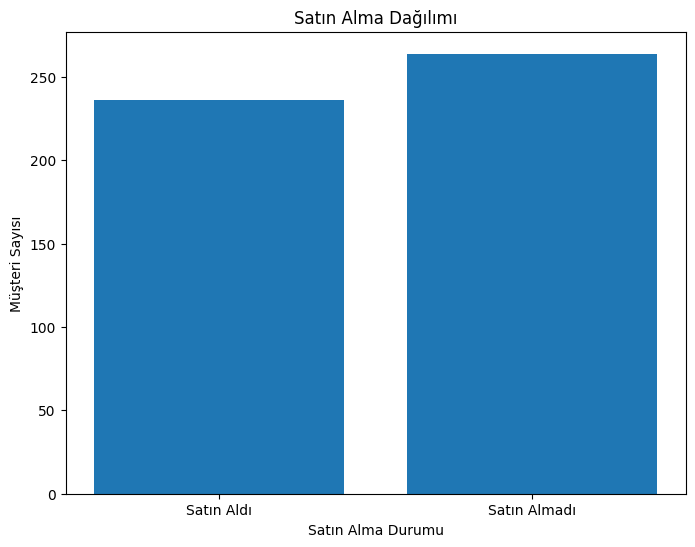

In [12]:
class_count = df['Satın aldı mı'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(class_count.index, class_count.values, tick_label=['Satın Almadı', 'Satın Aldı'])
plt.title("Satın Alma Dağılımı")
plt.xlabel("Satın Alma Durumu")
plt.ylabel("Müşteri Sayısı")
plt.show()

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        72
           1       0.54      0.65      0.59        78

    accuracy                           0.53       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.52      0.53      0.52       150



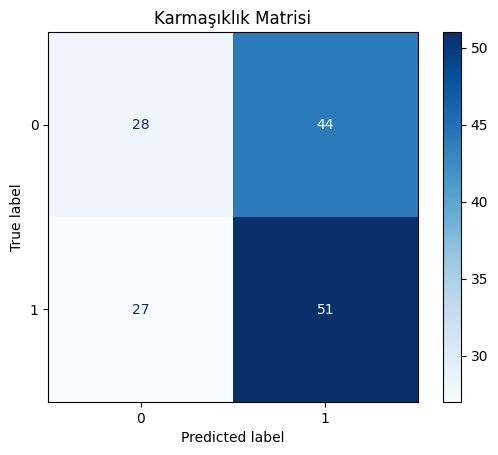

In [13]:
y_pred = model.predict(X_test)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Karmaşıklık Matrisi")
plt.show()

naive bayes Varsayımlarda

1- Koşullu bağımsızlık var mı ?

2- Sürekli ve Ayrık değerler var mı ?

3- Dengesiz Veri var mı ?

4- Sıfır Frekans Problemi= Laplace Smoothing yapılırken alpha parametresi iyi ayarlanmalı

KNN Algoritması Optimum K Hesaplama Yöntemleri:

1- Cross Validation = Çok fazla veri ve özellik varsa

2- Grid Search with Validation = Küçük ver setiniz varsa

3- Dirsek Yöntemi = Çok sayıda veri varsa.

4- Leave-One-Out Cross Validation = Küçük veri setlerinde